## Example 1 (簡單線性回歸)
y=ax+b,a稱為斜率，b稱為截距。

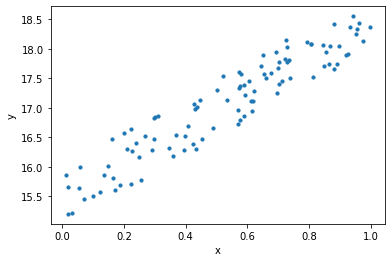

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# 亂數產生資料
np.random.seed(0)
noise = np.random.rand(100, 1)
x = np.random.rand(100, 1)
y = 3 * x + 15 + noise
# y=ax+b Target function  a=3, b=15


# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 迴歸決策樹
Parameters:
- criterion: 評估切割點指標，mse/friedman_mse/mae。
- max_depth: 樹的最大深度。
- splitter: 特徵劃分點選擇標準，best/random。預設為best。
- random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
- min_samples_split: 至少有多少資料才能再分
- min_samples_leaf: 分完至少有多少資料才能分


Attributes:
- feature_importances_: 查詢模型特徵的重要程度。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。
- get_depth: 取得樹的深度。

In [2]:
from sklearn.tree import DecisionTreeRegressor

# 建立DecisionTreeRegressor模型
decisionTreeModel = DecisionTreeRegressor(criterion = 'mse', max_depth=4, splitter='best', random_state=42)
# 使用訓練資料訓練模型
decisionTreeModel.fit(x, y)
# 使用訓練資料預測
predicted=decisionTreeModel.predict(x)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


### 模型評估
scikit-learn 決策樹迴歸模型的score函式是R2 score，可作為模型評估依據，其數值越接近於1代表模型越佳。
除了R2 score還有其他許多回歸模型的評估方法，例如： MSE、MAE、RMSE。

In [3]:
from sklearn import metrics
print('R2 score: ', decisionTreeModel.score(x, y))
mse = metrics.mean_squared_error(y, predicted)
print('MSE score: ', mse)

R2 score:  0.9319595487655477
MSE score:  0.050389813894820126


max_depth = 4,  MSE:  0.050389813894820126


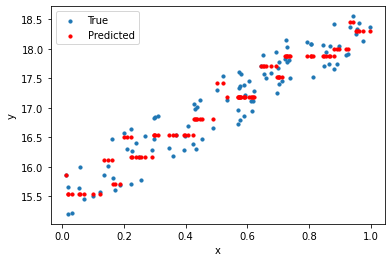

In [4]:
# plot
print('max_depth = 4,  MSE: ', mse)
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
import graphviz
from sklearn.tree import export_graphviz

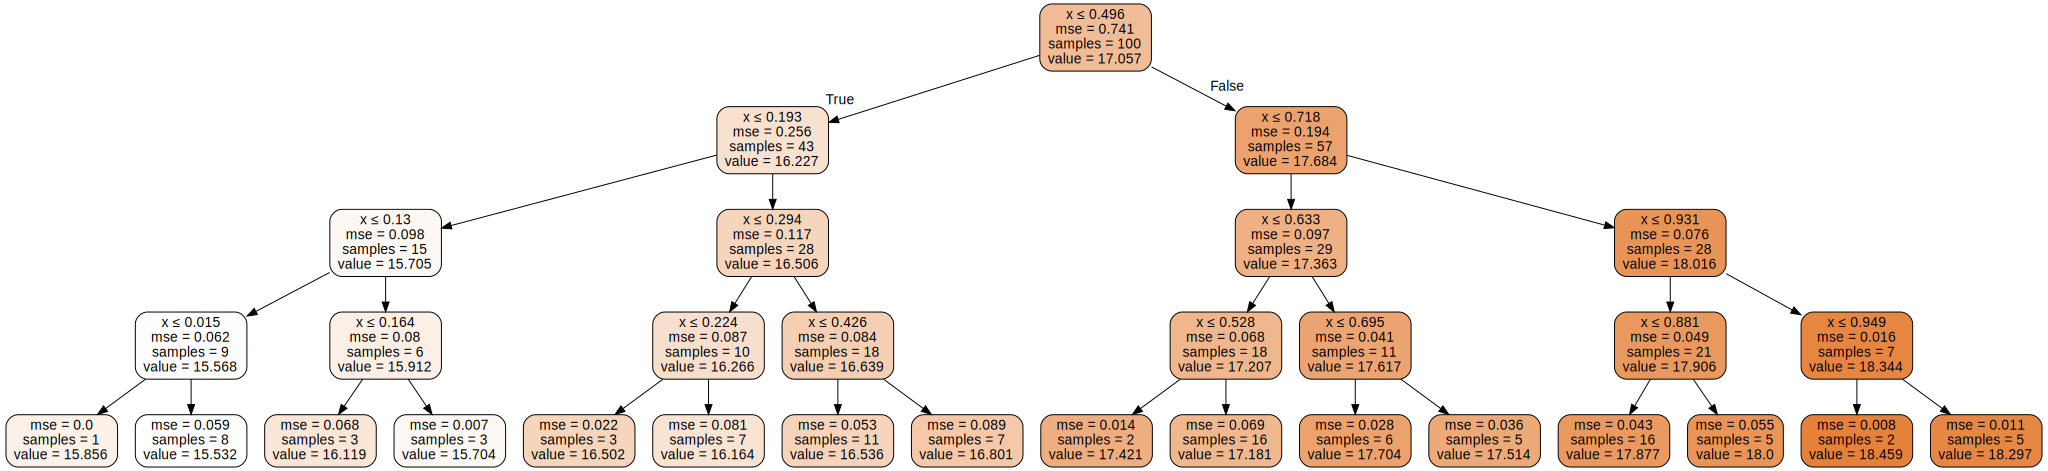

In [6]:
dot_data = export_graphviz(decisionTreeModel, out_file=None, 
                         feature_names=['x'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

## 非線性回歸
上面的例子資料都很均勻分布在一條直線上，但現實的資料可能並只會發生在一條線上。下面示範一個多項次的回歸模型例子。

In [7]:
x = np.array([[1.40280301e-01],[9.03857692e-01],[5.35815131e-01],[3.58391981e-01],[2.43418162e-02],[2.43342904e-02],[3.37370600e-03],[7.50261116e-01],[3.61339257e-01],[5.01366775e-01],[4.23721405e-04],[9.40725121e-01],[6.92960750e-01],[4.50878979e-02],[3.30603187e-02],[3.36372142e-02],[9.25633424e-02],[2.75369313e-01],[1.86576499e-01],[8.48144121e-02],[3.74363965e-01],[1.94585372e-02],[8.53484957e-02],[1.34221000e-01],[2.07999831e-01],[6.16501290e-01],[3.98696193e-02],[2.64437058e-01],[3.50955021e-01],[2.15764084e-03],[3.69110747e-01],[2.90784768e-02],[4.23170975e-03],[9.00383763e-01],[9.32445223e-01],[6.53506272e-01],[9.27895484e-02],[9.53984185e-03],[4.68174835e-01],[1.93734218e-01]])
y = np.array([ 5.82469676e+00,  7.94613194e+00,  9.24976070e+00,  6.59761731e+00,
        2.16651685e+00, -2.50365745e-03, -1.00182588e+00,  9.02075194e+00,
        8.57086436e+00,  8.50848958e+00, -7.34549241e-02,  8.73802779e+00,
        7.26038154e+00,  2.38778217e+00,  2.02397265e+00,  3.57417666e+00,
        5.15052189e+00,  5.57291682e+00,  6.83461431e+00,  4.20408429e+00,
        7.21499207e+00,  2.24057093e+00,  5.63575746e+00,  6.66180813e+00,
        5.91402744e+00,  8.29511673e+00,  3.18174801e+00,  8.23158707e+00,
        7.30330971e+00,  2.55480191e-02,  6.76197223e+00,  1.05656839e+00,
        1.21851645e+00,  1.03566236e+01,  8.95941549e+00,  9.67640393e+00,
        5.17463285e+00,  2.25781800e-01,  8.60137397e+00,  8.13359834e+00])

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


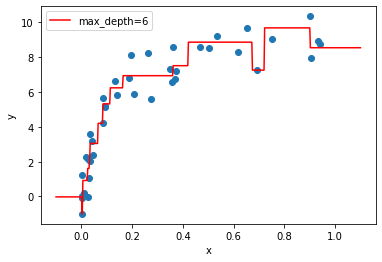

In [8]:
decisionTreeModel = DecisionTreeRegressor(criterion = 'mse', max_depth=4, random_state=42)
decisionTreeModel.fit(x, y)

x_test = np.linspace(-0.1,1.1,500)[:,None]
predicted=decisionTreeModel.predict(x_test)
plt.scatter(x.ravel(),y)
plt.plot(x_test,predicted,label='max_depth=6', color='r')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


max_depth = 4,  MSE:  0.08887613486268871


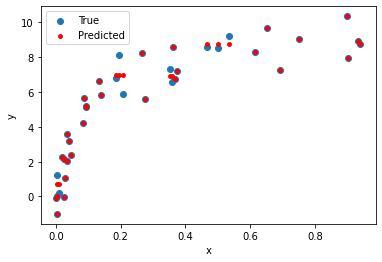

In [9]:
decisionTreeModel = DecisionTreeRegressor(criterion = 'mse', max_depth=6, random_state=42)
decisionTreeModel.fit(x, y)
predicted=decisionTreeModel.predict(x)

mse = metrics.mean_squared_error(y, predicted)

print('max_depth = 4,  MSE: ', mse)
plt.scatter(x.ravel(),y, label='True')
plt.scatter(x.ravel(), predicted, color="r", label='Predicted', s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()